In [1]:
# Load .data/mot/test_results.csv as a dataframe

import pandas as pd

mot = pd.read_csv('.data/mot/test_result.csv', sep='|')

# drop the test_id and vehicle_id columns
mot = mot.drop(['test_id'], axis=1)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25


In [2]:
# Load .data/mot/lookup/mdr_fuel_types.csv as a dataframe
fuel_types = pd.read_csv('.data/mot/lookup/mdr_fuel_types.csv', sep='|')

# Merge the two dataframes on the fuel_type column
mot = pd.merge(mot, fuel_types, left_on='fuel_type', right_on='type_code', how='left', suffixes=('', '_desc'))

# Load .data/mot/lookup/mdr_test_outcome.csv as a dataframe
test_outcome = pd.read_csv('.data/mot/lookup/mdr_test_outcome.csv', sep='|')
mot = pd.merge(mot, test_outcome, left_on='test_result', right_on='result_code', how='left', suffixes=('', '_desc'))
mot.drop(['type_code', 'result_code'], axis=1, inplace=True)
mot.rename(columns={'result': 'test_result_desc'}, inplace=True)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed


In [3]:
# Drop any first_use and test_date before 1970, to avoid invalid ages due to the UNIX epoch
mot = mot[mot['first_use_date'] >= '1970-01-01']
mot = mot[mot['test_date'] >= '1970-01-01']

# Calculate an age column (in days) based on the test_date and first_use_date columns
mot['test_date'] = pd.to_datetime(mot['test_date'])
mot['first_use_date'] = pd.to_datetime(mot['first_use_date'])
mot['age'] = (mot['test_date'] - mot['first_use_date']).dt.days
mot['age_years'] = mot['age'] / 365.25

# Combine make and model into one column
mot['make_model'] = mot['make'] + ' ' + mot['model']  # Combine make and model into one column

# Let us focus on data where cylinder capacity is between 500 and 5000
mot = mot[(mot['cylinder_capacity'] >= 500) & (mot['cylinder_capacity'] <= 5000)]

# If test_result_desc is 'Passed', or 'Pass with Rectification at Station', test_result_class is 'Pass'
# If test_result_desc is 'Failed', test_result_class is 'Fail'
# If anything else, test_result_class is 'Other'
mot['test_result_class'] = 'Other'
mot.loc[mot['test_result_desc'].isin(['Passed', 'Pass with Rectification at Station']), 'test_result_class'] = 'Pass'
mot.loc[mot['test_result_desc'] == 'Failed', 'test_result_class'] = 'Fail'

# Drop any negative ages, as they are likely to be errors
mot = mot[mot['age'] >= 0]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model,test_result_class
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed,2390,6.543463,TOYOTA PRIUS +,Pass
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed,5223,14.299795,TOYOTA PRIUS,Pass
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station,4735,12.963723,TOYOTA PRIUS,Pass
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed,5759,15.767283,TOYOTA PRIUS,Fail
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed,5759,15.767283,TOYOTA PRIUS,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed,8857,24.249144,HONDA BEAT,Pass
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed,2677,7.329227,RENAULT MASTER,Pass
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed,5092,13.941136,PEUGEOT 207,Pass
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed,5302,14.516085,NISSAN MICRA,Pass


In [4]:
# Drop any rows where test_type is not 'NT'
mot = mot[mot['test_type'] == 'NT']

# Sample the data for only the top 20 make and model combinations
top_20 = mot['make_model'].value_counts().head(20).index
mot = mot[mot['make_model'].isin(top_20)]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model,test_result_class
21,1493398641,2023-01-01,4,NT,P,41682.0,SR,NISSAN,JUKE,GREY,DI,1461.0,2016-05-13,Diesel,Passed,2424,6.636550,NISSAN JUKE,Pass
25,1200062230,2023-01-01,4,NT,P,91473.0,G,VOLKSWAGEN,GOLF,SILVER,DI,1598.0,2010-03-20,Diesel,Passed,4670,12.785763,VOLKSWAGEN GOLF,Pass
26,1237843361,2023-01-01,4,NT,PRS,162891.0,B,VOLKSWAGEN,TRANSPORTER,WHITE,DI,1968.0,2012-10-01,Diesel,Pass with Rectification at Station,3744,10.250513,VOLKSWAGEN TRANSPORTER,Pass
28,1324341521,2023-01-01,4,NT,P,151830.0,WF,AUDI,A4,GREY,DI,1968.0,2014-03-05,Diesel,Passed,3224,8.826831,AUDI A4,Pass
30,922055125,2023-01-01,4,NT,P,21153.0,CO,FORD,FOCUS,BLACK,PE,999.0,2020-01-31,Petrol,Passed,1066,2.918549,FORD FOCUS,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216698,1349094589,2023-12-31,4,NT,P,149031.0,EH,HONDA,CIVIC,BLACK,DI,2199.0,2013-09-13,Diesel,Passed,3761,10.297057,HONDA CIVIC,Pass
42216701,700228101,2023-12-31,4,NT,PRS,105679.0,LU,NISSAN,JUKE,WHITE,PE,1598.0,2014-03-24,Petrol,Pass with Rectification at Station,3569,9.771389,NISSAN JUKE,Pass
42216705,677896545,2023-12-31,4,NT,P,169683.0,SA,AUDI,A3,RED,PE,1395.0,2014-12-16,Petrol,Passed,3302,9.040383,AUDI A3,Pass
42216709,541766398,2023-12-31,4,NT,P,79328.0,SP,VAUXHALL,ASTRA,BLACK,PE,1796.0,2008-03-06,Petrol,Passed,5778,15.819302,VAUXHALL ASTRA,Pass


In [5]:
# Keep only postcode_area, age_years, test_mileage, cylinder capacity, model and test_result_class columns - do it in place
mot = mot[['postcode_area', 'age_years', 'test_mileage', 'cylinder_capacity', 'model', 'test_result_class']]

# Encode all non numeric columns as categories
for col in mot.select_dtypes(include=['object']).columns:
    mot[col] = mot[col].astype('category').cat.codes

mot

/var/folders/yn/46gxkz715ml5fyjmrqr5wjxr0000gn/T/ipykernel_41913/649308672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mot[col] = mot[col].astype('category').cat.codes
/var/folders/yn/46gxkz715ml5fyjmrqr5wjxr0000gn/T/ipykernel_41913/649308672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mot[col] = mot[col].astype('category').cat.codes
/var/folders/yn/46gxkz715ml5fyjmrqr5wjxr0000gn/T/ipykernel_41913/649308672.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,postcode_area,age_years,test_mileage,cylinder_capacity,model,test_result_class
21,94,6.636550,41682.0,1461.0,13,2
25,36,12.785763,91473.0,1598.0,11,2
26,2,10.250513,162891.0,1968.0,18,2
28,111,8.826831,151830.0,1968.0,3,2
30,16,2.918549,21153.0,999.0,10,2
...,...,...,...,...,...,...
42216698,31,10.297057,149031.0,2199.0,6,2
42216701,61,9.771389,105679.0,1598.0,13,2
42216705,85,9.040383,169683.0,1395.0,2,2
42216709,93,15.819302,79328.0,1796.0,4,2


In [6]:
# Do a stratified sample of the data, keeping 10% of the data
from sklearn.model_selection import train_test_split

def stratified_sample(data, column, fraction):
    # Use train_test_split to perform the stratified sampling
    _, sampled = train_test_split(
        data, 
        test_size=fraction, 
        stratify=data[column],  # Stratify by the column to keep the distribution
        random_state=42  # For reproducibility
    )

    # Drop any categories with less than 100 samples
    sampled = sampled.groupby(column).filter(lambda x: len(x) > 100)
    
    return sampled

mot = stratified_sample(mot, 'test_result_class', 0.10)

In [7]:
# Show all column object types
mot.dtypes

postcode_area           int8
age_years            float64
test_mileage         float64
cylinder_capacity    float64
model                   int8
test_result_class       int8
dtype: object

In [8]:
# In some cases, the test_mileage can be NaN (missing). Fill these with zero
mot['test_mileage'] = mot['test_mileage'].fillna(0)

In [9]:
import torch

# Set default torch device to mps when available
device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu' # MPS doesn't seem to work with KAN
torch.set_default_device(device)
print('Using device:', torch.get_default_device())

# Ensure the target variable is categorical
mot['test_result_class'] = mot['test_result_class'].astype('category')

# Split the data into features and target
X = mot.drop(['test_result_class'], axis=1)
y = mot['test_result_class']

# Remember column names for later plotting
column_names = X.columns.to_list()
labels = y.cat.categories.to_list()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Put X_train, X_test, y_train, y_test into dataset['train_input'], dataset['test_input'], dataset['train_label'], dataset['test_label']
dataset = {}
dataset['train_input'] = torch.tensor(X_train.values, dtype=torch.float32)
dataset['test_input'] = torch.tensor(X_test.values, dtype=torch.float32)
dataset['train_label'] = torch.tensor(y_train.cat.codes.values, dtype=torch.int64)
dataset['test_label'] = torch.tensor(y_test.cat.codes.values, dtype=torch.int64)

X = dataset['train_input']
y = dataset['train_label']

print(X.shape, y.shape)

Using device: cpu
torch.Size([856142, 5]) torch.Size([856142])


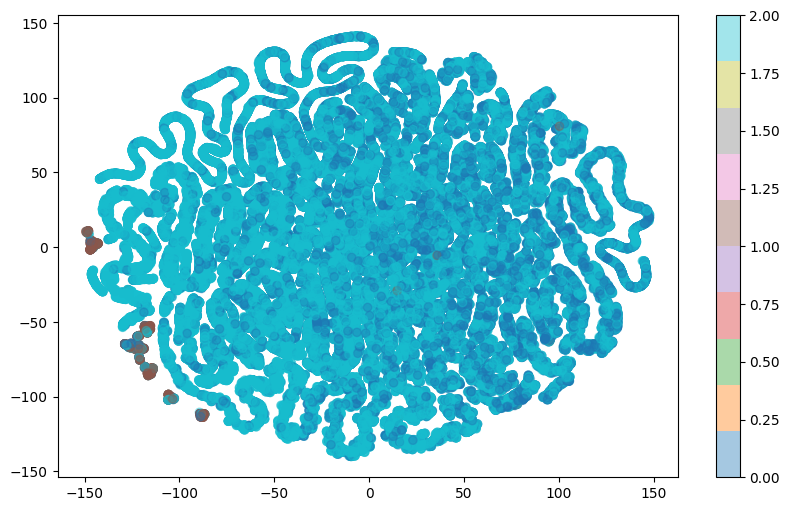

In [10]:
# Plot X/y as a 2D scatter plot, using tSNE to reduce the dimensionality
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are on a non-CPU device, move them to CPU first, as StratifedShuffleSplit only works on CPU
X_cpu = X.to('cpu')
y_cpu = y.to('cpu')

# Setting up StratifiedShuffleSplit to get a balanced subset of 100,000 samples
sss = StratifiedShuffleSplit(n_splits=1, test_size=100000, random_state=42)

# This will give indices for one split of the data
for train_index, test_index in sss.split(X_cpu.numpy(), y_cpu.numpy()):
    X_sample, y_sample = X_cpu[test_index], y_cpu[test_index]

# Applying tSNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_sample)

# Plotting
fig = plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='tab10', alpha=0.4)
plt.colorbar(scatter)
plt.show()

# We no longer need X_cpu and y_cpu
del X_cpu, y_cpu


In [11]:
# Show the unique values in y
labels

[0, 1, 2]

In [15]:
import kan as kan

model = kan.KAN(width=[5,8,3], grid=3, k=3)

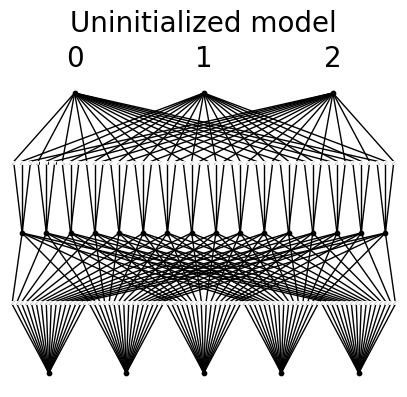

In [16]:
# Plot the uninitialized model

model(X)
model.plot(beta=100,
           out_vars=labels,
           title='Uninitialized model')

In [17]:
def train_acc():
    return torch.mean(
        (torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean(
        (torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset,
                      opt="LBFGS",
                      steps=30,
                      metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss())
results['train_acc'][-1], results['test_acc'][-1]

train loss: 1.40e+00 | test loss: 1.41e+00 | reg: 3.29e+01 : 100%|█| 30/30 [2:37:40<00:00, 315.35s/i


(0.6544486880302429, 0.6556560397148132)